In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from numpy import linalg as la
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, train_test_split, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy as np
data = load_breast_cancer()


In [37]:
X, y = data.data, data.target
sc = StandardScaler()
X = sc.fit_transform(X)

In [38]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

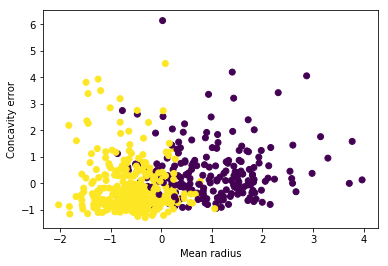

In [39]:
plt.xlabel('Mean radius')
plt.ylabel('Concavity error')
plt.scatter(X[:,0], X[:,15], c=data.target)
plt.show()

In [40]:
np.trace(np.cov(X.T))

30.052816901408452

In [41]:
print(la.eig(np.cov(X.T))[0])

[  1.33049908e+01   5.70137460e+00   2.82291016e+00   1.98412752e+00
   1.65163324e+00   1.20948224e+00   6.76408882e-01   4.77456255e-01
   4.17628782e-01   3.51310875e-01   2.94433153e-01   2.61621161e-01
   2.41782421e-01   1.57286149e-01   9.43006956e-02   8.00034045e-02
   5.95036135e-02   5.27114222e-02   4.95647002e-02   1.33279057e-04
   7.50121413e-04   1.59213600e-03   6.91261258e-03   8.19203712e-03
   1.55085271e-02   1.80867940e-02   2.43836914e-02   2.74877113e-02
   3.12142606e-02   3.00256631e-02]


In [42]:
variance = [i/sum(la.eig(np.cov(X.T))[0]) for i in la.eig(np.cov(X.T))[0]]
print(variance)

[0.44272025607526366, 0.18971182044033091, 0.093931632574313847, 0.066021349154701328, 0.054957684923462667, 0.040245220398833492, 0.022507337129825049, 0.015887238000213223, 0.013896493745591081, 0.011689781894131474, 0.0097971898759801439, 0.0087053790073788381, 0.0080452498719673152, 0.0052336574549263527, 0.0031378321676273956, 0.0026620933651523111, 0.0019799679253242647, 0.0017539594502263588, 0.001649253059225155, 4.4348274273803211e-06, 2.4960103246884642e-05, 5.29779290380974e-05, 0.00023001546250594909, 0.00027258799547750091, 0.00051604237916518902, 0.00060183356667167559, 0.00081136125889909999, 0.00091464675105434195, 0.0010386467483387064, 0.00099909646370024909]


In [43]:
pca = PCA(n_components = len(data.feature_names))
X_pca = pca.fit_transform(X)

In [44]:
print(la.eig(np.cov(X_pca.T))[0])

[  1.33049908e+01   5.70137460e+00   2.82291016e+00   1.98412752e+00
   1.65163324e+00   1.20948224e+00   6.76408882e-01   4.77456255e-01
   4.17628782e-01   3.51310875e-01   2.94433153e-01   2.61621161e-01
   2.41782421e-01   1.57286149e-01   9.43006956e-02   8.00034045e-02
   5.95036135e-02   5.27114222e-02   3.12142606e-02   3.00256631e-02
   2.74877113e-02   2.43836914e-02   1.80867940e-02   1.55085271e-02
   8.19203712e-03   6.91261258e-03   1.59213600e-03   1.33279057e-04
   7.50121413e-04   4.95647002e-02]


In [45]:
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[  4.42720256e-01   1.89711820e-01   9.39316326e-02   6.60213492e-02
   5.49576849e-02   4.02452204e-02   2.25073371e-02   1.58872380e-02
   1.38964937e-02   1.16897819e-02   9.79718988e-03   8.70537901e-03
   8.04524987e-03   5.23365745e-03   3.13783217e-03   2.66209337e-03
   1.97996793e-03   1.75395945e-03   1.64925306e-03   1.03864675e-03
   9.99096464e-04   9.14646751e-04   8.11361259e-04   6.01833567e-04
   5.16042379e-04   2.72587995e-04   2.30015463e-04   5.29779290e-05
   2.49601032e-05   4.43482743e-06]
[ 0.44272026  0.63243208  0.72636371  0.79238506  0.84734274  0.88758796
  0.9100953   0.92598254  0.93987903  0.95156881  0.961366    0.97007138
  0.97811663  0.98335029  0.98648812  0.98915022  0.99113018  0.99288414
  0.9945334   0.99557204  0.99657114  0.99748579  0.99829715  0.99889898
  0.99941502  0.99968761  0.99991763  0.99997061  0.99999557  1.        ]


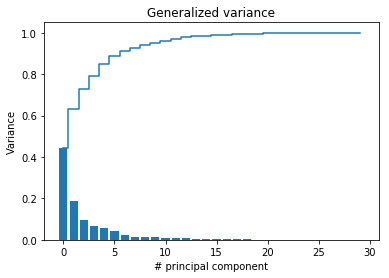

In [46]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, align = 'center')
plt.step(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), where = 'mid')
plt.title('Generalized variance')
plt.xlabel('# principal component')
plt.ylabel('Variance')
plt.show()

In [47]:
np.sum(np.cov(X_pca.T))

30.052816901408423

In [48]:
sum(pca.components_[0]*pca.components_[1])

1.0408340855860843e-16

In [49]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25, random_state = 0)


pipe = Pipeline([('scl', StandardScaler()),
                ('clf', KNeighborsClassifier())])

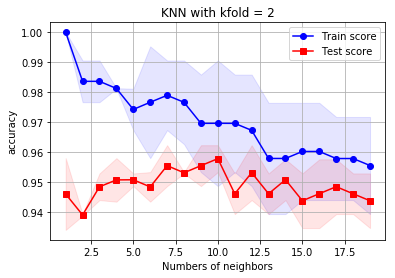

In [50]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 2,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kfold = 2')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

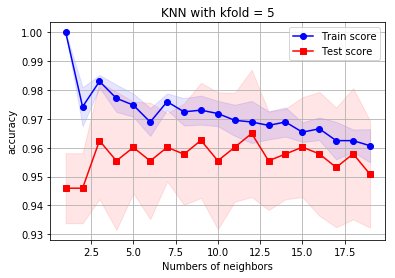

In [51]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 5,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kfold = 5')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

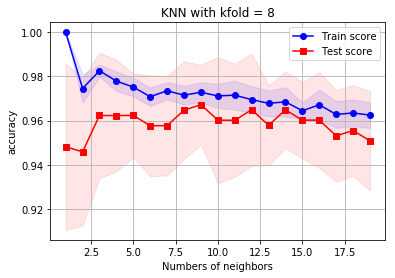

In [52]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 8,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kfold = 8')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

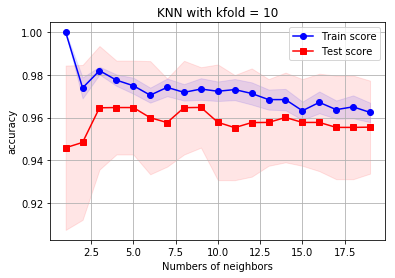

In [53]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 10,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kfold = 10')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [54]:
# the best result with kfold = 8 and neighbors = 9


In [55]:
pipe = Pipeline([('scl', StandardScaler()),
                ('clf', KNeighborsClassifier())])

kfold = [2, 5, 8, 10]

param_grid = [{'clf__n_neighbors':list(range(1,20)), 'clf__metric': ['euclidean']},
             {'clf__n_neighbors':list(range(1,20)), 'clf__metric': ['manhattan']},
             {'clf__n_neighbors':list(range(1,20)), 'clf__metric': ['chebyshev']},
             {'clf__n_neighbors':list(range(1,20)), 'clf__metric': ['canberra']},
             {'clf__n_neighbors':list(range(1,20)), 'clf__metric': ['braycurtis']}]

for i in kfold:
    gs = GridSearchCV (estimator = pipe,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = i,
                  n_jobs = -1)
    gs = gs.fit(X_train, y_train)
    clf = gs.best_estimator_
    clf.fit(X_train, y_train)
    print('kfold = ', i)
    print(gs.best_params_)
    print('train ', gs.best_score_)
    y_test_predict = clf.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    print('hold-out ', 1 - err_test, '\t')


kfold =  2
{'clf__metric': 'braycurtis', 'clf__n_neighbors': 4}
train  0.967136150235
hold-out  0.937062937063 	
kfold =  5
{'clf__metric': 'braycurtis', 'clf__n_neighbors': 5}
train  0.969483568075
hold-out  0.93006993007 	
kfold =  8
{'clf__metric': 'braycurtis', 'clf__n_neighbors': 3}
train  0.974178403756
hold-out  0.93006993007 	
kfold =  10
{'clf__metric': 'braycurtis', 'clf__n_neighbors': 3}
train  0.974178403756
hold-out  0.93006993007 	


In [57]:
pca = PCA(n_components = 5)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_pca, y, test_size = 0.25, random_state = 0)


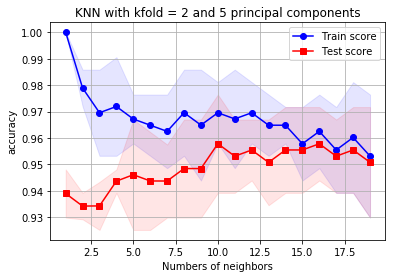

In [58]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 2,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kfold = 2 and 5 principal components')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

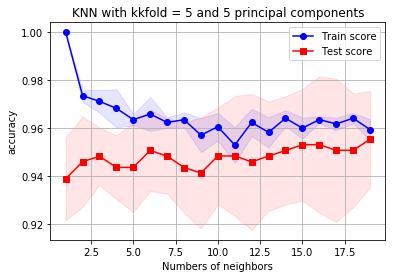

In [59]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 5,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kkfold = 5 and 5 principal components')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

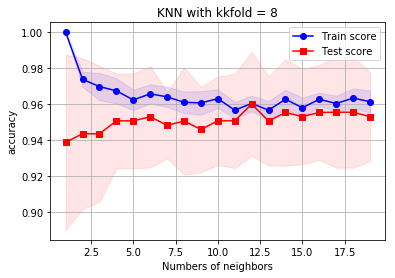

In [60]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 8,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kkfold = 8')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

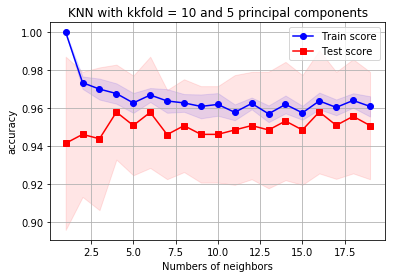

In [61]:
param_range = list(range(1,20))
train_scores, test_scores = \
    validation_curve(estimator = pipe, X = X_train, y = y_train,
                   param_name = 'clf__n_neighbors',
                   param_range = param_range,
                   cv = 10,
                   n_jobs = -1)
    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', label = 'Train score', marker = 'o')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha =0.1, color = 'blue')
plt.plot(param_range, test_mean, color = 'red', label = 'Test score', marker = 's')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha =0.1, color = 'red')
plt.title('KNN with kkfold = 10 and 5 principal components')
plt.xlabel('Numbers of neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [62]:
loo = LeaveOneOut()
loo.get_n_splits(X)

569

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
err_test =[]
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test.append(np.mean(y_test  != y_test_predict))



In [64]:
print(1-np.mean(err_test))

0.973637961336
